# Encoder for TSP

    ## Install tsplib95 <- used to read tsp files

In [1]:
pip install tsplib95

In [2]:
#Load necessary libraries
import tsplib95
import math
import numpy as np
from my_tsp_lib import *            #custom library for TSP
from my_tsp_decoder  import *       #custom library for TSP encoder

In [3]:
#Load the tsp problem. Using 5 point problem as sample
############################################
file_path='aatemp.tsp'
#file_path='h20.tsp'
(tsp_name, tsp_df, tsp_dist_matrix) = tsp_load(file_path)	#load problem
no_of_cities=len(tsp_df.index.tolist())
print ("TSP loaded is: " + tsp_name)
print ("No of cities is: " + str (no_of_cities))

TSP loaded is: aatemp
No of cities is: 5


In [4]:
#calculate city bits, tour bits and generate random tour string
city_bits = math.ceil (math.log(no_of_cities,2))
tour_bits = city_bits * no_of_cities
tour_score_gray =  [np.random.randint(0,2)  for x in range(tour_bits)]
print ("City bits = Log2(N)     = " + str (city_bits))
print ("Tour bits = N * Log2(N) = " + str (tour_bits))
print ("Random tour_score_gray  : " + str (tour_score_gray))

City bits = Log2(N)     = 3
Tour bits = N * Log2(N) = 15
Random tour_score_gray  : [1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1]


In [5]:
tour1, errors1 = grayScore2tour (tour_score_gray, no_of_cities, city_bits, verbose = True)
print ("---------------------------------------------")
print ("Decoded tour_score_gray  : " + str (tour1))
print ("Errors in tour_score_gray: " + str (errors1))

Random tour_score_gray   : [1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1]
Random tour_score_dec    : [5, 7, 1, 1, 1]
Random tour_score_repair : [5, 7, 1, 2, 3]
Random tour_score_sort   : [1, 2, 3, 5, 7] <- not req in python
---------------------------------------------
Decoded tour_score_gray  : [2, 3, 4, 0, 1]
Errors in tour_score_gray: 2


## Plot the random tour
    # Random tour
    # Random tour with modifications

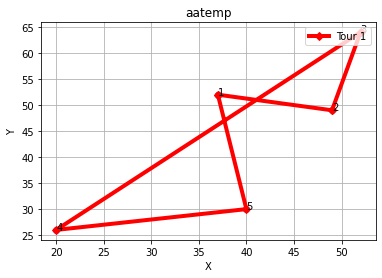

In [6]:
tsp_tour_plot ((tsp_df["xcord"].tolist(), tsp_df["ycord"].tolist()), tour1, name=(tsp_name), saveplot=False)

In [7]:
# Random bit mutation <- First 
mut_bit=np.random.randint(len (tour_score_gray))
print ("Bit mutation             = " + str (mut_bit))
tour_score_gray[mut_bit] = 0 if tour_score_gray[mut_bit] else 1
tour2, errors2 = grayScore2tour (tour_score_gray, no_of_cities, city_bits, verbose = True)
print ("Decoded tour_score_gray  : " + str (tour2))
print ("Errors in tour_score_gray: " + str (errors2))

Bit mutation             = 6
Random tour_score_gray   : [1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1]
Random tour_score_dec    : [5, 7, 6, 1, 1]
Random tour_score_repair : [5, 7, 6, 1, 2]
Random tour_score_sort   : [1, 2, 5, 6, 7] <- not req in python
Decoded tour_score_gray  : [3, 4, 0, 2, 1]
Errors in tour_score_gray: 1


In [8]:
# Random bit mutation <- Second 
mut_bit=np.random.randint(len (tour_score_gray))
print ("Bit mutation             = " + str (mut_bit))
tour_score_gray[mut_bit] = 0 if tour_score_gray[mut_bit] else 1
tour3, errors3 = grayScore2tour (tour_score_gray, no_of_cities, city_bits, verbose = True)
print ("Decoded tour_score_gray  : " + str (tour3))
print ("Errors in tour_score_gray: " + str (errors3))

Bit mutation             = 5
Random tour_score_gray   : [1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1]
Random tour_score_dec    : [5, 6, 6, 1, 1]
Random tour_score_repair : [5, 6, 7, 1, 2]
Random tour_score_sort   : [1, 2, 5, 6, 7] <- not req in python
Decoded tour_score_gray  : [3, 4, 0, 1, 2]
Errors in tour_score_gray: 2


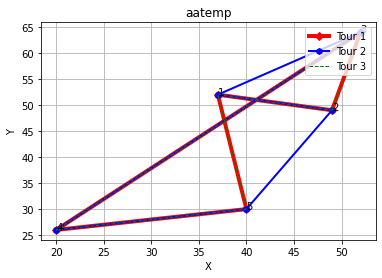

In [9]:
tsp_tour_plot ((tsp_df["xcord"].tolist(), tsp_df["ycord"].tolist()), tour1, tour2, tour3, name=(tsp_name), saveplot=False)

# Second example

TSP loaded is: h20
No of cities is: 20
City bits = Log2(N)     = 5
Tour bits = N * Log2(N) = 100
Random tour_score_gray  : [0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0]
---------------------------------------------
Decoded tour_score_gray2  : [3, 16, 8, 11, 17, 7, 0, 13, 18, 5, 10, 19, 12, 4, 15, 6, 14, 1, 9, 2]
Errors in tour_score_gray1: 5
---------------------------------------------
Bit mutation             = 47
Decoded tour_score_gray2  : [3, 16, 8, 11, 17, 7, 0, 13, 18, 5, 10, 19, 12, 4, 15, 9, 6, 14, 1, 2]
Errors in tour_score_gray2: 5
---------------------------------------------
Bit mutation             = 35
Decoded tour_score_gray3  : [3, 16, 8, 11, 17, 0, 13, 18, 5, 10, 7, 12, 4, 15, 9, 19, 6, 14, 1, 2]
Errors in tour_score_

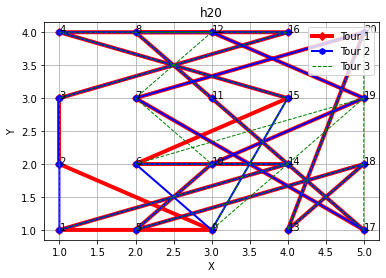

In [10]:
file_path='h20.tsp'
(tsp_name, tsp_df, tsp_dist_matrix) = tsp_load(file_path)	#load problem
no_of_cities=len(tsp_df.index.tolist())
print ("TSP loaded is: " + tsp_name)
print ("No of cities is: " + str (no_of_cities))

############################################
#calculate city bits, tour bits and generate random tour string
city_bits = math.ceil (math.log(no_of_cities,2))
tour_bits = city_bits * no_of_cities
tour_score_gray =  [np.random.randint(0,2)  for x in range(tour_bits)]
print ("City bits = Log2(N)     = " + str (city_bits))
print ("Tour bits = N * Log2(N) = " + str (tour_bits))
print ("Random tour_score_gray  : " + str (tour_score_gray))

############################################
tour1, errors1 = grayScore2tour (tour_score_gray, no_of_cities, city_bits, verbose = False)
print ("---------------------------------------------")
print ("Decoded tour_score_gray2  : " + str (tour1))
print ("Errors in tour_score_gray1: " + str (errors1))
print ("---------------------------------------------")
############################################
#tsp_tour_plot ((tsp_df["xcord"].tolist(), tsp_df["ycord"].tolist()), tour1, name=(tsp_name), saveplot=False)

############################################
# Random bit mutation <- First 
mut_bit=np.random.randint(len (tour_score_gray))
print ("Bit mutation             = " + str (mut_bit))
tour_score_gray[mut_bit] = 0 if tour_score_gray[mut_bit] else 1
tour2, errors2 = grayScore2tour (tour_score_gray, no_of_cities, city_bits, verbose = False)
print ("Decoded tour_score_gray2  : " + str (tour2))
print ("Errors in tour_score_gray2: " + str (errors2))
print ("---------------------------------------------")
############################################
# Random bit mutation <- Second 
mut_bit=np.random.randint(len (tour_score_gray))
print ("Bit mutation             = " + str (mut_bit))
tour_score_gray[mut_bit] = 0 if tour_score_gray[mut_bit] else 1
tour3, errors3 = grayScore2tour (tour_score_gray, no_of_cities, city_bits, verbose = False)
print ("Decoded tour_score_gray3  : " + str (tour3))
print ("Errors in tour_score_gray3: " + str (errors3))
print ("---------------------------------------------")
############################################
tsp_tour_plot ((tsp_df["xcord"].tolist(), tsp_df["ycord"].tolist()), tour1, tour2, tour3, name=(tsp_name), saveplot=False)

############################################

# Third example

In [11]:
print ("Problems available:\
       1 -> aatemp.tsp\
       2 -> burma14.tsp\
       3 -> ulysses16.tsp\
       4 -> h20.tsp\
       5 -> ulysses22.tsp\
     ")

Problems available:       1 -> aatemp.tsp       2 -> burma14.tsp       3 -> ulysses16.tsp       4 -> h20.tsp       5 -> ulysses22.tsp     


In [12]:
try:
   problem = int(input("Enter number of cities (1-5 only): "))
except ValueError:
   print ("This is not valid input (1-5)")
   print ("Using 1 (default)")

Enter number of cities (1-5 only): 3


In [13]:
if problem == 2:
    file_path='burma14.tsp'
elif problem == 3:
    file_path='ulysses16.tsp'
elif problem == 4:
    file_path='h20.tsp'
elif problem == 5:
    file_path='ulysses22.tsp'
else:
    file_path='aatemp.tsp'

TSP loaded is: ulysses16.tsp
No of cities is: 16
City bits = Log2(N)     = 4
Tour bits = N * Log2(N) = 64
Random tour_score_gray  : [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0]
Random tour_score_gray   : [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0]
Random tour_score_dec    : [3, 7, 6, 10, 10, 14, 5, 6, 4, 0, 4, 2, 3, 2, 3, 8]
Random tour_score_repair : [3, 7, 6, 10, 11, 14, 5, 9, 4, 0, 12, 2, 13, 15, 16, 8]
Random tour_score_sort   : [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16] <- not req in python
---------------------------------------------
Decoded tour_score_gray2  : [9, 11, 0, 8, 6, 2, 1, 15, 7, 3, 4, 10, 12, 5, 13, 14]
Errors in tour_score_gray1: 6
------------------------------

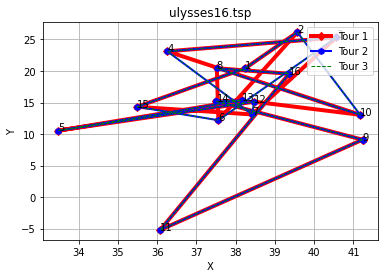

In [14]:
(tsp_name, tsp_df, tsp_dist_matrix) = tsp_load(file_path)	#load problem
no_of_cities=len(tsp_df.index.tolist())
print ("TSP loaded is: " + tsp_name)
print ("No of cities is: " + str (no_of_cities))

############################################
#calculate city bits, tour bits and generate random tour string
city_bits = math.ceil (math.log(no_of_cities,2))
tour_bits = city_bits * no_of_cities
tour_score_gray =  [np.random.randint(0,2)  for x in range(tour_bits)]
print ("City bits = Log2(N)     = " + str (city_bits))
print ("Tour bits = N * Log2(N) = " + str (tour_bits))
print ("Random tour_score_gray  : " + str (tour_score_gray))

############################################
tour1, errors1 = grayScore2tour (tour_score_gray, no_of_cities, city_bits, verbose = True)
print ("---------------------------------------------")
print ("Decoded tour_score_gray2  : " + str (tour1))
print ("Errors in tour_score_gray1: " + str (errors1))
print ("---------------------------------------------")
############################################
#tsp_tour_plot ((tsp_df["xcord"].tolist(), tsp_df["ycord"].tolist()), tour1, name=(tsp_name), saveplot=False)

############################################
# Random bit mutation <- First 
mut_bit=np.random.randint(len (tour_score_gray))
print ("Bit mutation             = " + str (mut_bit))
tour_score_gray[mut_bit] = 0 if tour_score_gray[mut_bit] else 1
tour2, errors2 = grayScore2tour (tour_score_gray, no_of_cities, city_bits, verbose = False)
print ("Decoded tour_score_gray2  : " + str (tour2))
print ("Errors in tour_score_gray2: " + str (errors2))
print ("---------------------------------------------")
############################################
# Random bit mutation <- Second 
mut_bit=np.random.randint(len (tour_score_gray))
print ("Bit mutation             = " + str (mut_bit))
tour_score_gray[mut_bit] = 0 if tour_score_gray[mut_bit] else 1
tour3, errors3 = grayScore2tour (tour_score_gray, no_of_cities, city_bits, verbose = False)
print ("Decoded tour_score_gray3  : " + str (tour3))
print ("Errors in tour_score_gray3: " + str (errors3))
print ("---------------------------------------------")
############################################
tsp_tour_plot ((tsp_df["xcord"].tolist(), tsp_df["ycord"].tolist()), tour1, tour2, tour3, name=(tsp_name), saveplot=False)

############################################